<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Independent Practice

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## Walmart Sales Data

For this independent practice, we'll analyze Walmart's weekly sales data over a two-year period from 2010 to 2012.

The data set is again separated by store and department, but we'll focus on analyzing one store for simplicity.

The data include:

* `Store`: The store number.
* `Dept`: The department number.
* `Date`: The week.
* `Weekly_Sales`: Sales for the given department in the given store.
* `IsHoliday`: Whether the week is a special holiday week.

### 1) Preprocess the data using Pandas.

* **Load the data.**
* **Convert the `Date` column to a `datetime` object.**
* **Set `Date` as the index of the DataFrame.**

In [2]:
walmart = pd.read_csv('data/train.csv')

In [3]:
walmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [10]:
walmart['Date'] = pd.to_datetime(walmart['Date'])
walmart.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [15]:
walmart.set_index('Date', inplace=True)

In [16]:
walmart.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


### 2) Filter the DataFrame to Store 1 sales and aggregate over departments to compute the total weekly sales per store. Store this in a new DataFrame.

In [18]:
store1_sales = pd.DataFrame(walmart[walmart['Store']==1].copy())
store1_sales.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [24]:
total_weekly_sales = store1_sales[['Weekly_Sales']].resample('W').sum()
total_weekly_sales

,Weekly_Sales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68
...,...
2012-09-30,1437059.26
2012-10-07,1670785.97
2012-10-14,1573072.81


### 3) Plot the rolling mean for `Weekly_Sales`. What general trends do you observe?

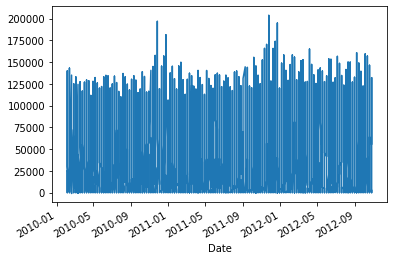

In [25]:
# true weekly sales rolling mean
weekly_sales_rolling_mean = store1_sales.Weekly_Sales.rolling(window=1, center=True).mean().plot()

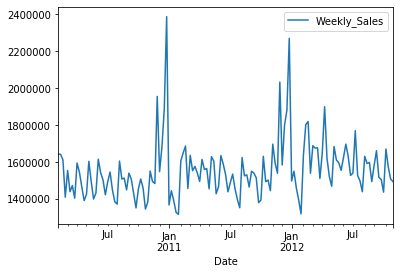

In [26]:
# aggregated weekly sales rolling mean
weekly_sales_rolling_mean = total_weekly_sales.rolling(window=1, center=True).mean().plot()

### 4) Compute the `1`, `13`, and `52` autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [29]:
print('Autocorrelation 1: ', total_weekly_sales['Weekly_Sales'].autocorr(1))
print('Autocorrelation 13: ', total_weekly_sales['Weekly_Sales'].autocorr(13))
print('Autocorrelation 52: ', total_weekly_sales['Weekly_Sales'].autocorr(52))

Autocorrelation 1:  0.3021582794113126
Autocorrelation 13:  0.10169228501987719
Autocorrelation 52:  0.8953760294777008


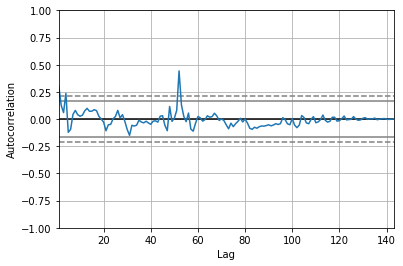

In [32]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(total_weekly_sales['Weekly_Sales']);

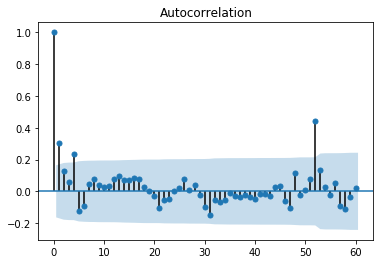

In [41]:
# autocorrelation function acf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(total_weekly_sales['Weekly_Sales'], lags=60)
plt.show()

### 5) Create a decomposition plot for the Store 1 sales data. 

<Figure size 432x288 with 0 Axes>

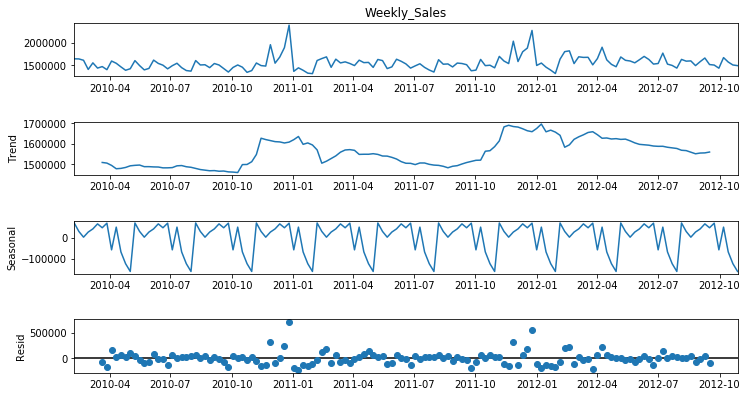

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(total_weekly_sales['Weekly_Sales'], period=13);  
fig = plt.figure();
fig = decomposition.plot(); 
fig.set_size_inches(12, 6);

### 6) Based on the analyses above, what can we deduce about this time series?

In [ ]:
# Big autocorrelation spikes are happening around 52, indicating some kind of yearly pattern.
# Autocorrelation is high at 1 and 2 lags (perhaps even up to 4), so it's most likely useful for an autoregressive model.
# There are no random spikes, so there's probably not much use for a moving average model.